In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def shortest_path_with_edges(G, source, target, weight="weight"):
    # Get shortest path nodes
    path_nodes = nx.shortest_path(G, source=source, target=target, weight=weight)
    
    # Extract edges and their attributes
    path_edges = [(path_nodes[i], path_nodes[i+1]) for i in range(len(path_nodes)-1)]
    path_edges_with_data = [(u, v, G[u][v]) for u, v in path_edges]

    return path_nodes, path_edges_with_data

In [3]:
# Depth-First Search (DFS)
def is_predecessor(G, target_node, starting_node):
    visited = set()
    stack = [starting_node]
    while stack:
        node = stack.pop()
        if node == target_node:
            return True
        if node not in visited:
            visited.add(node)
            # Traverse backwards (predecessors are other nodes at distance 1)
            stack.extend(G.predecessors(node))  
    return False

In [4]:
# Tree Graph Example
edge_bundle = [(1,2,{'weight':5}),
               (1,3,{'weight':2}), # !
                # branch 1
               (2,4,{'weight':7}),
               (2,5,{'weight':9}),
               (2,6,{'weight':10}),
                # branch 2
               (10,7,{'weight':15}),
               (3,7,{'weight':15}), # !
               (3,8,{'weight':25}),
               (3,9,{'weight':20}),
               ]
#for e in edge_bundle:
G = nx.DiGraph()
G.add_edges_from(edge_bundle)
print(G, G.size('weight'))
temporary_edge_bundle = [(7,1, {'weight':15})]

DiGraph with 10 nodes and 9 edges 108.0


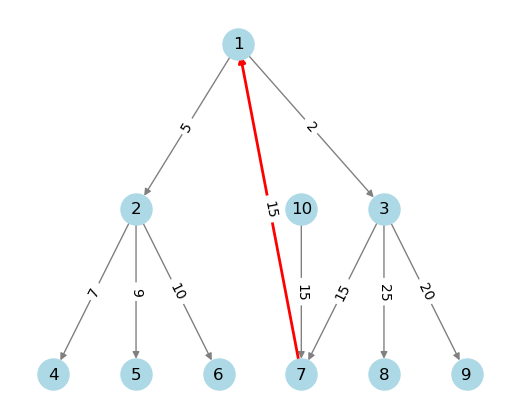

In [5]:
# Draw the tree using a hierarchical layout
T = G.copy()
T.add_edge(7,1, weight = 15)
plt.figure(figsize=(5, 4))
pos = nx.nx_agraph.graphviz_layout(T, prog="dot")  # Uses Graphviz for tree layout
nx.draw(G, pos, with_labels=True, node_size=500, node_color="lightblue", edge_color="gray")
# Draw the highlighted edge in red
nx.draw_networkx_edges(T, pos, edgelist=[(7,1, {'weight':15})], edge_color="red", width=2)
# Draw edge labels (weights)
edge_labels = {(u, v): T[u][v]['weight'] for u, v in T.edges()}
nx.draw_networkx_edge_labels(T, pos, edge_labels=edge_labels, font_color='black', font_size=10)

plt.show()

In [6]:
candidate = temporary_edge_bundle[0]
# is 1 predecessor of 7?
if is_predecessor(G, candidate[1], candidate[0]):
    # path_edges_with_data
    path_nodes, path_edges_with_data = shortest_path_with_edges(G, candidate[1], candidate[0], weight="weight")
    # delete from graph
    G.remove_edges_from(path_edges_with_data)
    # find minimum weight
    path_edges_with_data.append(candidate)
    path_edges_with_data = sorted(path_edges_with_data, key= lambda x: x[2]['weight'])
    min_weight = path_edges_with_data[0][2]['weight']
    path_edges_to_add = [(s,t,{'weight':w['weight']-min_weight}) for s,t,w in path_edges_with_data[1:]]
    # update graph 
    G.add_edges_from(edge_bundle)

In [7]:
print(G, G.size('weight'))
path_edges_to_add

DiGraph with 10 nodes and 9 edges 108.0


[(3, 7, {'weight': 13}), (7, 1, {'weight': 13})]